# Reaction Time Analysis

Description:

In [74]:
import pandas as pd
#dtypes = [int, str, str, str, int, str, pd.Timedelta, str]
data = pd.read_csv("reaction_time_results.csv", 
                   sep=",", header="infer", 
                   usecols=["ParticipantID", "Complexity", "Distraction", "ReactionTime"])
data["ParticipantID"] = pd.to_numeric(data["ParticipantID"])
data["ReactionTime"] = pd.to_timedelta(data["ReactionTime"])
data["ReactionTime"] = data["ReactionTime"].dt.total_seconds()
print(data)

## Scatterplots

### Attentive and distraction

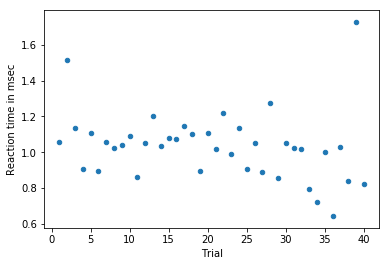

In [72]:
ad = data[(data["Complexity"] == "Attentive") & (data["Distraction"] == "Yes")].reset_index(drop=True)
ad.index += 1
ad['Trial'] = ad.index
adPlot = ad.plot.scatter(x='Trial', y='ReactionTime')
adPlot = adPlot.set_ylabel("Reaction time in msec")

### Attentive and no distraction

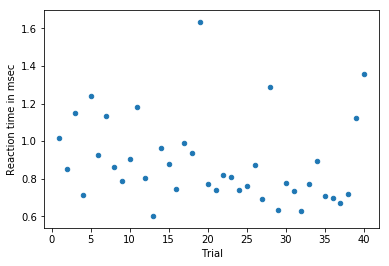

In [71]:
an = data[(data["Complexity"] == "Attentive") & (data["Distraction"] == "No")].reset_index(drop=True)
an.index += 1
an['Trial'] = an.index
anPlot = an.plot.scatter(x='Trial', y='ReactionTime')
anPlot = anPlot.set_ylabel("Reaction time in msec")

### Pre-attentive and distraction

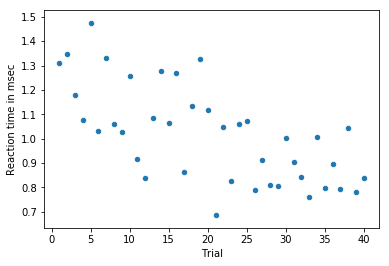

In [70]:
pd = data[(data["Complexity"] == "Pre-attentive") & (data["Distraction"] == "Yes")].reset_index(drop=True)
pd.index += 1
pd['Trial'] = pd.index
pdPlot = pd.plot.scatter(x='Trial', y='ReactionTime')
pdPlot = pdPlot.set_ylabel("Reaction time in msec")

### Pre-attentive and no distraction

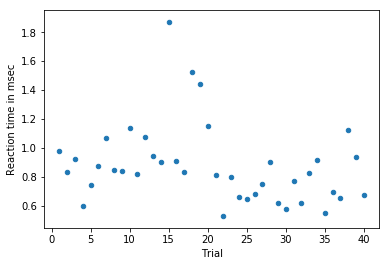

In [73]:
pn = data[(data["Complexity"] == "Pre-attentive") & (data["Distraction"] == "No")].reset_index()
pn.index += 1
pn['Trial'] = pn.index
pnPlot = pn.plot.scatter(x='Trial', y='ReactionTime')
pnPlot = pnPlot.set_ylabel("Reaction time in msec")

### All conditions

In [49]:
data.reset_index()
dataPlot = data.plot.scatter(x=data.index, y='ReactionTime')

KeyError: "Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,\n            ...\n            151, 152, 153, 154, 155, 156, 157, 158, 159, 160],\n           dtype='int64', length=160) not in index"

## T-tests

## Boxplots

## Discussion and Results

...